In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


## Imports

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import seaborn as sns

## Načitanie dát

In [5]:
dataset = pd.read_csv('../Data/final_dataset_5.csv')

## Dataset


In [6]:
dataset.shape

(1784, 2)

In [7]:
dataset.head()

,author_id,processed_text
0,132,good kowl said leader first chaplain laughed t...
1,132,till hall rang hounds bayed de aquila held han...
2,132,'blast moped good deal happen n't behave well ...
3,132,phil garron leaning side steamer rain felt unh...
4,132,talk better food us schools fires 'll wait ext...


In [8]:
print((dataset['processed_text']).isnull().sum())

0


In [9]:
print((dataset['author_id']).isnull().sum())

0


In [10]:
dataset['word_count'] = dataset['processed_text'].apply(lambda x: len(x.split()))
dataset['char_count'] = dataset['processed_text'].apply(lambda x: len(x.replace(" ", "")))

average_word_count = dataset['word_count'].mean()
average_char_count = dataset['char_count'].mean()

print(f"Priemerný počet slov: {average_word_count}")
print(f"Priemerný počet znakov (bez medzier): {average_char_count}")

Priemerný počet slov: 11180.10706278027
Priemerný počet znakov (bez medzier): 67042.14966367713


In [11]:
all_words_set = set()

for text in dataset['processed_text']:
    all_words_set.update(text.split())

total_unique_words = len(all_words_set)

print(f"Celkový počet unikátnych slov v datasete: {total_unique_words}")

Celkový počet unikátnych slov v datasete: 252556


In [12]:
x = 5000
long_texts = dataset['processed_text'].apply(lambda text: len(text.split()) > x)

num_long_texts = long_texts.sum()

print(f"Počet vstupov s viac ako {x} slovami je: {num_long_texts}")

Počet vstupov s viac ako 5000 slovami je: 1230


In [13]:
author_counts = dataset['author_id'].value_counts()
print(author_counts)

author_id
1800    160
1583    100
1181     86
520      70
213      62
       ... 
10        7
206       6
783       6
755       6
344       6
Name: count, Length: 82, dtype: int64


In [14]:
print('Počet autorov: ', len(dataset['author_id'].unique()))

Počet autorov:  82


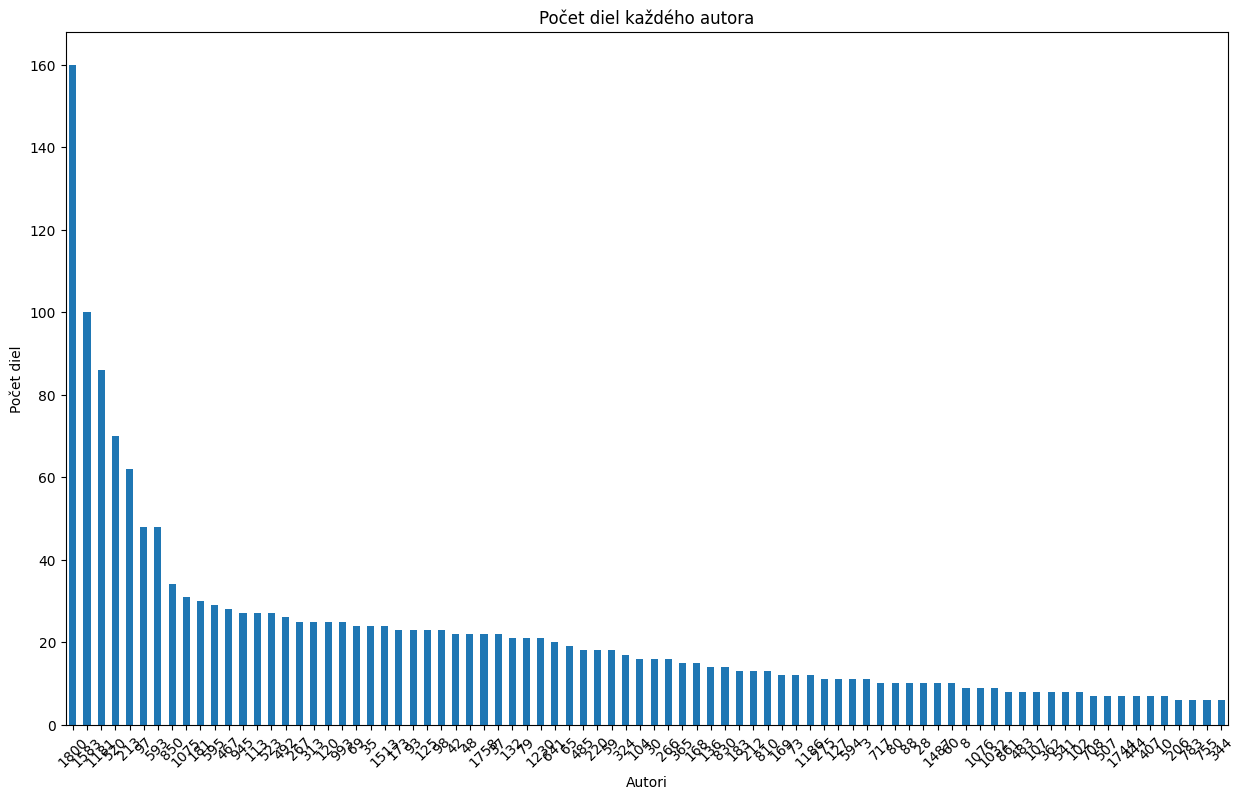

In [15]:
plt.figure(figsize=(15, 9))
author_counts.plot(kind='bar')
plt.title('Počet diel každého autora')
plt.xlabel('Autori')
plt.ylabel('Počet diel')
plt.xticks(rotation=45)
plt.show()